In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
data=pd.read_csv('daily_csv.csv')

In [35]:
data

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18


In [36]:
data.isnull().any()

Date     False
Price     True
dtype: bool

In [37]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [38]:
data.tail()

,Date,Price
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18
5937,2020-08-11,2.19


In [39]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [40]:
data.drop('Date',axis=1,inplace=True)

In [41]:
data

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [42]:
data['Price'].fillna(data['Price'].median(),inplace=True)

In [43]:
data.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

In [44]:
data.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189121,2008.366959,6.468003,15.712193
std,2.191042,6.825348,3.415981,8.742158
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,6.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


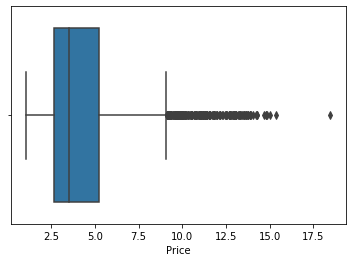

In [45]:
sns.boxplot(data['Price'])

In [46]:
from scipy import stats

In [47]:
y=np.abs(stats.zscore(data))
y

array([[0.16848238, 1.6655437 , 1.600847  , 0.99665627],
       [0.17761123, 1.6655437 , 1.600847  , 0.8822584 ],
       [0.26433526, 1.6655437 , 1.600847  , 0.76786053],
       ...,
       [0.93074095, 1.70453149, 0.44851721, 0.99665627],
       [0.91704769, 1.70453149, 0.44851721, 0.65346267],
       [0.91248326, 1.70453149, 0.44851721, 0.5390648 ]])

In [48]:
threshold=3
np.where(y>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
        2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
        2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
        2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
        2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
        2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
        2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
        2870, 2871, 2872, 2873, 2874, 2875, 2876], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
df_no_outliers=data[(y<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [50]:
df_no_outliers.shape

(5821, 4)

# DATA VISUALIZATION

No handles with labels found to put in legend.


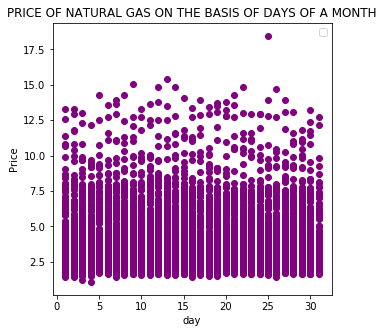

In [51]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='purple')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No handles with labels found to put in legend.


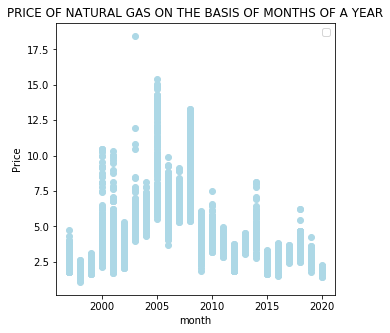

In [52]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='lightblue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

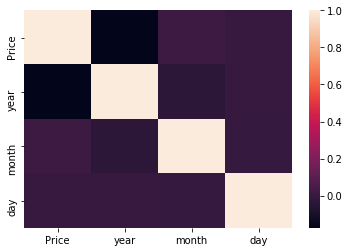

In [53]:
#heat map
sns.heatmap(data.corr())

No handles with labels found to put in legend.


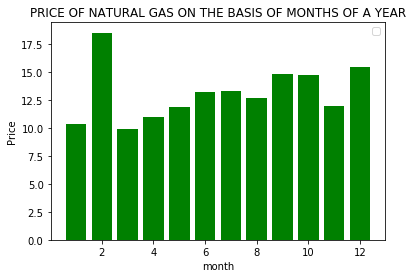

In [55]:
plt.bar(data['month'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

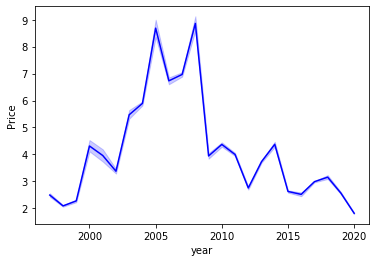

In [57]:
#line graph
sns.lineplot(x='year',y='Price',data=data,color='blue')

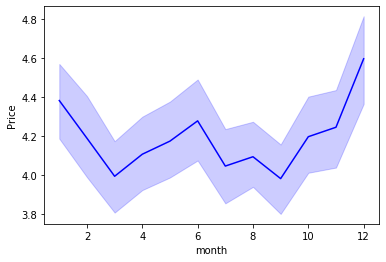

In [58]:
sns.lineplot(x='month',y='Price',data=data,color='blue')

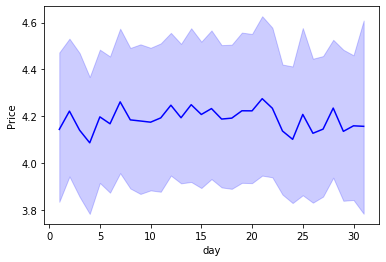

In [59]:
sns.lineplot(x='day',y='Price',data=data,color='blue')

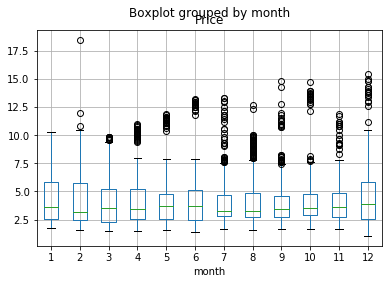

In [60]:
#boxplot
data.boxplot(column='Price',by='month')

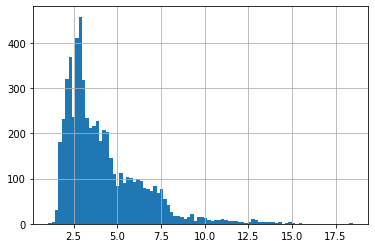

In [61]:
#histogram
data['Price'].hist(bins=90)

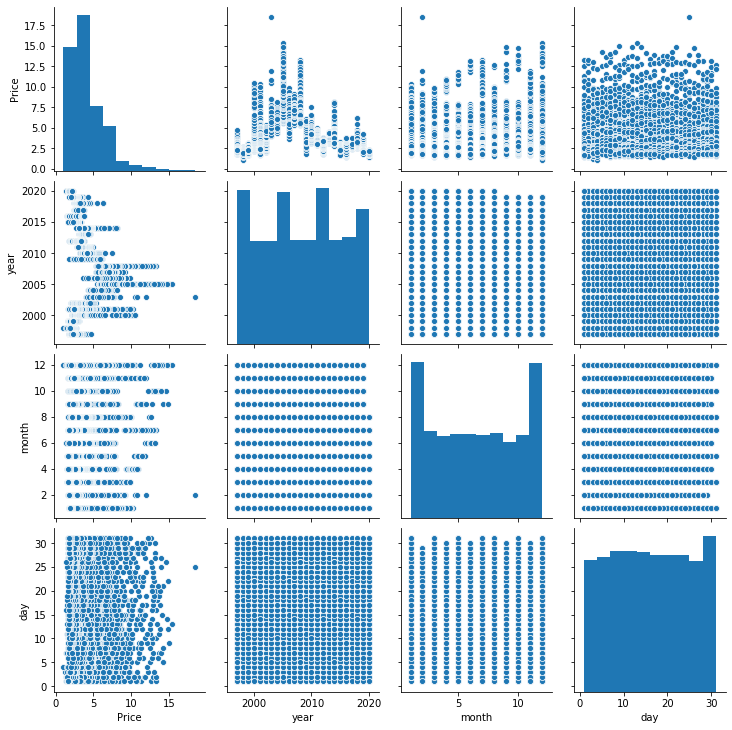

In [62]:
sns.pairplot(data)
plt.show()

# independent and dependent variables

In [63]:
x=x=data.iloc[:,1:4].values
y=data.iloc[:,0].values

In [64]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

In [65]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

# Since all values are numerical and no ctegorical data is present there is no need for encoding

In [66]:
#Standardization and splitting testing and training dataset

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.6655437 , -1.600847  , -0.99665627],
       [-1.6655437 , -1.600847  , -0.8822584 ],
       [-1.6655437 , -1.600847  , -0.76786053],
       ...,
       [ 1.70453149,  0.44851721, -0.99665627],
       [ 1.70453149,  0.44851721, -0.65346267],
       [ 1.70453149,  0.44851721, -0.5390648 ]])

In [73]:
print(x_train.shape) #training input
print(x_test.shape) #testing input
print(y_train.shape) #training output
print(y_test.shape) #testing output

(4750, 3)
(1188, 3)
(4750,)
(1188,)


# Model Building-Decision Tree Regressor

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [75]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\HP\anaconda3.x\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'po

In [76]:
df=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
y_pred_df=df.predict(x_test)
y_pred_df

array([3.11933333, 2.88277228, 8.24      , ..., 2.15      , 3.708     ,
       4.6204878 ])

In [78]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [79]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.9748804870642802


In [81]:
import joblib
joblib.dump(df,"H:\ADS SMARTBRDIGE\Decision Tree Regressor.save")

['H:\\ADS SMARTBRDIGE\\Decision Tree Regressor.save']

In [86]:
#Visualization
#use pydotplus and graphviz

In [101]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([3.54, 3.  , 7.4 , ..., 2.16, 3.81, 4.35])

In [104]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [105]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9718594635222015


In [106]:
joblib.dump(rfr,"H:\ADS SMARTBRDIGE\Random Forest Regressor.save")

['H:\\ADS SMARTBRDIGE\\Random Forest Regressor.save']

In [107]:
#Model Evaluation of Decision Tree Regressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.2144324151248813

In [108]:
mean_squared_error(y_test,y_pred_df)

0.1330883550988383

In [109]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.3648127671817946

In [114]:
#Model evaluation for Random Forest Regressor
mean_absolute_error(y_test,y_pred_rfr)

0.18534511784511773

In [115]:
mean_squared_error(y_test,y_pred_rfr)

0.14909436026936018

In [116]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.38612738865478086

In [117]:
#We can see that the Decision Tree Regressor is more closer to 0.